In [ ]:
!pip freeze


absl-py==1.4.0
accelerate==1.3.0
aiohappyeyeballs==2.4.6
aiohttp==3.11.13
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.6.0
arviz==0.20.0
astropy==7.0.1
astropy-iers-data==0.2025.3.3.0.34.45
astunparse==1.6.3
atpublic==4.1.0
attrs==25.1.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.38.0
bigquery-magics==0.6.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==3.2.0
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.20.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from sklearn.model_selection import ParameterGrid

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving merged_turbidity_weather_iqr.csv to merged_turbidity_weather_iqr.csv


In [ ]:
df = pd.read_csv('merged_turbidity_weather_iqr.csv')

df.head()

,Date,Turbidity (NTU),temperature_2m (°C),relative_humidity_2m (%),wind_direction_10m (°),wind_speed_10m (km/h),soil_moisture_0_to_7cm (m³/m³) Lag72,relative_humidity_2m (%) Lag3,wind_direction_10m (°) Lag6,wind_speed_10m(km/h) Lag6,direct_radiation (W/m²) Lag72
0,2021-01-03 15:00:00,0.419150,3.7,78,33,19.9,0.392,89.0,34.0,6.5,95.0
1,2021-01-03 16:00:00,0.422334,3.6,80,42,17.2,0.391,85.0,32.0,9.1,55.0
2,2021-01-03 17:00:00,0.402026,3.5,78,42,16.1,0.391,80.0,32.0,11.5,25.0
3,2021-01-03 18:00:00,0.400664,3.0,77,37,14.5,0.390,78.0,30.0,13.6,3.0
4,2021-01-03 19:00:00,0.399815,2.7,81,36,14.9,0.389,80.0,40.0,15.3,0.0


In [ ]:
df = df.drop(columns=['wind_direction_10m (°)', 'wind_direction_10m (°) Lag6'])
df.head()

,Date,Turbidity (NTU),temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_moisture_0_to_7cm (m³/m³) Lag72,relative_humidity_2m (%) Lag3,wind_speed_10m(km/h) Lag6,direct_radiation (W/m²) Lag72
0,2021-01-03 15:00:00,0.419150,3.7,78,19.9,0.392,89.0,6.5,95.0
1,2021-01-03 16:00:00,0.422334,3.6,80,17.2,0.391,85.0,9.1,55.0
2,2021-01-03 17:00:00,0.402026,3.5,78,16.1,0.391,80.0,11.5,25.0
3,2021-01-03 18:00:00,0.400664,3.0,77,14.5,0.390,78.0,13.6,3.0
4,2021-01-03 19:00:00,0.399815,2.7,81,14.9,0.389,80.0,15.3,0.0


In [ ]:
# Change the time series variable name
df = df.rename(columns={'Date': 'ds', 'Turbidity (NTU)': 'y'})
df['ds'] = pd.to_datetime(df['ds'], format='%Y-%m-%d %H:%M:%S')

df.head()

,ds,y,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_moisture_0_to_7cm (m³/m³) Lag72,relative_humidity_2m (%) Lag3,wind_speed_10m(km/h) Lag6,direct_radiation (W/m²) Lag72
0,2021-01-03 15:00:00,0.419150,3.7,78,19.9,0.392,89.0,6.5,95.0
1,2021-01-03 16:00:00,0.422334,3.6,80,17.2,0.391,85.0,9.1,55.0
2,2021-01-03 17:00:00,0.402026,3.5,78,16.1,0.391,80.0,11.5,25.0
3,2021-01-03 18:00:00,0.400664,3.0,77,14.5,0.390,78.0,13.6,3.0
4,2021-01-03 19:00:00,0.399815,2.7,81,14.9,0.389,80.0,15.3,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26179 entries, 0 to 26178
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   ds                                    26179 non-null  datetime64[ns]
 1   y                                     26179 non-null  float64       
 2   temperature_2m (°C)                   26179 non-null  float64       
 3   relative_humidity_2m (%)              26179 non-null  int64         
 4   wind_speed_10m (km/h)                 26179 non-null  float64       
 5   soil_moisture_0_to_7cm (m³/m³) Lag72  26179 non-null  float64       
 6   relative_humidity_2m (%) Lag3         26179 non-null  float64       
 7   wind_speed_10m(km/h) Lag6             26179 non-null  float64       
 8   direct_radiation (W/m²) Lag72         26179 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 1.8 MB


In [ ]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [ ]:
# save the train and test sets to CSV files
train.to_csv('train.csv')
test.to_csv('test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20943 entries, 0 to 20942
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   ds                                    20943 non-null  datetime64[ns]
 1   y                                     20943 non-null  float64       
 2   temperature_2m (°C)                   20943 non-null  float64       
 3   relative_humidity_2m (%)              20943 non-null  int64         
 4   wind_speed_10m (km/h)                 20943 non-null  float64       
 5   soil_moisture_0_to_7cm (m³/m³) Lag72  20943 non-null  float64       
 6   relative_humidity_2m (%) Lag3         20943 non-null  float64       
 7   wind_speed_10m(km/h) Lag6             20943 non-null  float64       
 8   direct_radiation (W/m²) Lag72         20943 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 1.4 MB


In [ ]:
train.head()

,ds,y,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_moisture_0_to_7cm (m³/m³) Lag72,relative_humidity_2m (%) Lag3,wind_speed_10m(km/h) Lag6,direct_radiation (W/m²) Lag72
0,2021-01-03 15:00:00,0.419150,3.7,78,19.9,0.392,89.0,6.5,95.0
1,2021-01-03 16:00:00,0.422334,3.6,80,17.2,0.391,85.0,9.1,55.0
2,2021-01-03 17:00:00,0.402026,3.5,78,16.1,0.391,80.0,11.5,25.0
3,2021-01-03 18:00:00,0.400664,3.0,77,14.5,0.390,78.0,13.6,3.0
4,2021-01-03 19:00:00,0.399815,2.7,81,14.9,0.389,80.0,15.3,0.0


# Prophet model

In [ ]:
# Look at df
train.head()

,ds,y,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_moisture_0_to_7cm (m³/m³) Lag72,relative_humidity_2m (%) Lag3,wind_speed_10m(km/h) Lag6,direct_radiation (W/m²) Lag72
0,2021-01-03 15:00:00,0.419150,3.7,78,19.9,0.392,89.0,6.5,95.0
1,2021-01-03 16:00:00,0.422334,3.6,80,17.2,0.391,85.0,9.1,55.0
2,2021-01-03 17:00:00,0.402026,3.5,78,16.1,0.391,80.0,11.5,25.0
3,2021-01-03 18:00:00,0.400664,3.0,77,14.5,0.390,78.0,13.6,3.0
4,2021-01-03 19:00:00,0.399815,2.7,81,14.9,0.389,80.0,15.3,0.0


In [ ]:
%pip install prophet
from prophet import Prophet

In [ ]:
# Building the prophet model
m = Prophet(
   # daily_seasonality=False,
   # weekly_seasonality=False,
    yearly_seasonality=True,
   # monthly_seasonality=True,
    seasonality_mode='additive',
    seasonality_prior_scale=10,
    changepoint_prior_scale=0.05
)

# Add additional regressors (external factors) to the model
m.add_regressor('temperature_2m (°C)')
m.add_regressor('relative_humidity_2m (%)')
m.add_regressor('wind_speed_10m (km/h)')
m.add_regressor('relative_humidity_2m (%) Lag3')
m.add_regressor('wind_speed_10m(km/h) Lag6')
m.add_regressor('soil_moisture_0_to_7cm (m³/m³) Lag72')
m.add_regressor('direct_radiation (W/m²) Lag72')


# fit the model to the train data
m.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqfritso_/d3a0o5rv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqfritso_/fp8pzt72.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35651', 'data', 'file=/tmp/tmpqfritso_/d3a0o5rv.json', 'init=/tmp/tmpqfritso_/fp8pzt72.json', 'output', 'file=/tmp/tmpqfritso_/prophet_modelg50jxo61/prophet_model-20250603000400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:04:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:04:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Regressor Coefficients

In [ ]:
from prophet.utilities import regressor_coefficients
regressor_coefficients(m)


,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,temperature_2m (°C),additive,10.746517,0.003784,0.003784,0.003784
1,relative_humidity_2m (%),additive,78.048704,0.000600,0.000600,0.000600
2,wind_speed_10m (km/h),additive,13.725221,0.002978,0.002978,0.002978
3,relative_humidity_2m (%) Lag3,additive,78.048847,-0.002720,-0.002720,-0.002720
4,wind_speed_10m(km/h) Lag6,additive,13.724514,-0.000583,-0.000583,-0.000583
5,soil_moisture_0_to_7cm (m³/m³) Lag72,additive,0.320859,-1.104619,-1.104619,-1.104619
6,direct_radiation (W/m²) Lag72,additive,75.219501,-0.000092,-0.000092,-0.000092


In [ ]:
# Build a function to interpret the coefficients
def interpret_prophet_coeficients(df):

    interpretation = []
    for _, row in df.iterrows():
        regressor = row['regressor']
        mode = row['regressor_mode']
        coef = row['coef']
        effect_type = 'positive' if coef > 0 else 'negative' if coef < 0 else 'zero'

        if mode == 'multiplicative':
            interpretation.append(f"The {regressor} has a {effect_type} multiplicative effect on the target variable.")
        elif mode == 'additive':
            interpretation.append(f"The {regressor} has a {effect_type} additive effect on the target variable.")
        else:
            interpretation.append(f"The {regressor} has an unknown effect on the target variable.")


    return interpretation

coefs = pd.DataFrame(regressor_coefficients(m))
interpretation = interpret_prophet_coeficients(coefs)
for interpret in interpretation:
    print(interpret)


The temperature_2m (°C) has a positive additive effect on the target variable.
The relative_humidity_2m (%) has a positive additive effect on the target variable.
The wind_speed_10m (km/h) has a positive additive effect on the target variable.
The relative_humidity_2m (%) Lag3 has a negative additive effect on the target variable.
The wind_speed_10m(km/h) Lag6 has a negative additive effect on the target variable.
The soil_moisture_0_to_7cm (m³/m³) Lag72 has a negative additive effect on the target variable.
The direct_radiation (W/m²) Lag72 has a negative additive effect on the target variable.


# Cross-Validation

In [ ]:
from prophet.diagnostics import cross_validation


In [ ]:
# Apply the CV to the model
train_cv = cross_validation(model=m, period='720 hours', horizon='24 hours', initial='8760 hours', parallel='processes')

train_cv.head()


INFO:prophet:Making 17 forecasts with cutoffs between 2022-01-30 05:00:00 and 2023-05-25 05:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7a71507eec10>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqfritso_/erddlpbg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqfritso_/l98012bp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqfritso_/6khb8aie.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqfritso_/w04g7mwo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqfritso_/mxt1swju.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqfritso_/93gva1lp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqfritso_/2g0rkycg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqfritso_/95x1h4h6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqfritso_/93u3obq0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqfritso_/ysotpfsq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqfritso_/cj9hu_ee.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqfritso_/1n3jy_lg.json
DEBUG:cmdstanpy:input tempfile: /

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-01-30 06:00:00,0.402937,-0.001381,0.812033,0.472005,2022-01-30 05:00:00
1,2022-01-30 07:00:00,0.409412,0.022033,0.836502,0.557350,2022-01-30 05:00:00
2,2022-01-30 08:00:00,0.415134,-0.004094,0.823697,0.616455,2022-01-30 05:00:00
3,2022-01-30 09:00:00,0.427546,0.004907,0.822016,0.637449,2022-01-30 05:00:00
4,2022-01-30 10:00:00,0.460355,0.018010,0.877516,0.614660,2022-01-30 05:00:00


In [ ]:
train_cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          408 non-null    datetime64[ns]
 1   yhat        408 non-null    float64       
 2   yhat_lower  408 non-null    float64       
 3   yhat_upper  408 non-null    float64       
 4   y           408 non-null    float64       
 5   cutoff      408 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(4)
memory usage: 19.3 KB


In [ ]:
# Performance metrics
from prophet.diagnostics import performance_metrics
performance_metrics(train_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,0 days 03:00:00,0.081066,0.284721,0.219309,0.335982,0.143935,0.274566,0.891176
1,0 days 04:00:00,0.099372,0.315233,0.234637,0.381786,0.256480,0.290760,0.882353
2,0 days 05:00:00,0.134519,0.366768,0.266499,0.372095,0.218748,0.288928,0.857353
3,0 days 06:00:00,0.167681,0.409489,0.307582,0.413695,0.230613,0.310573,0.782353
4,0 days 07:00:00,0.188548,0.434221,0.340734,0.430439,0.281403,0.333475,0.748529
5,0 days 08:00:00,0.195653,0.442327,0.360762,0.424721,0.268823,0.344033,0.755882
6,0 days 09:00:00,0.198305,0.445315,0.377115,0.427889,0.298840,0.362611,0.714706
7,0 days 10:00:00,0.209736,0.457970,0.383462,0.399127,0.338031,0.364973,0.689706
8,0 days 11:00:00,0.217095,0.465934,0.381422,0.349359,0.299956,0.351251,0.672059
9,0 days 12:00:00,0.208761,0.456904,0.367870,0.319339,0.260120,0.331953,0.705882


In [ ]:
# RMSE and MAPE
rmse = round(performance_metrics(train_cv)['rmse'].mean(),0)
mape = round(performance_metrics(train_cv)['mape'].mean()*100,2)
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

RMSE: 0.0
MAPE: 33.72


/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


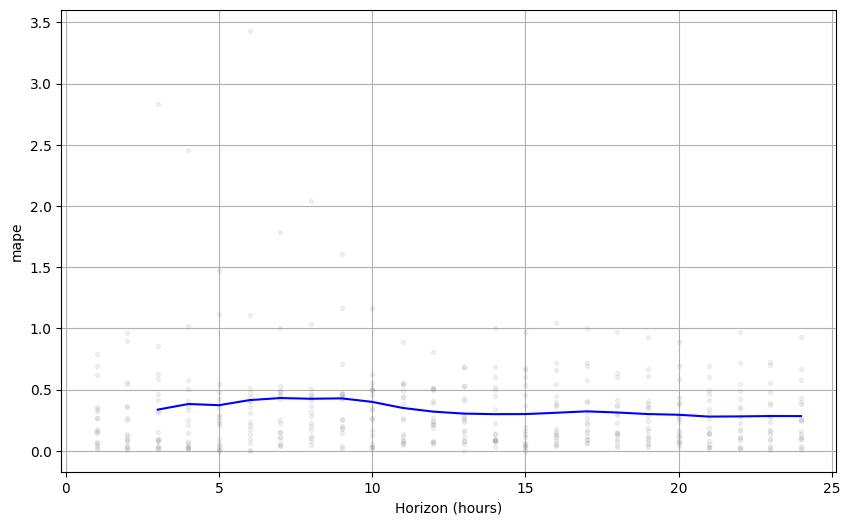

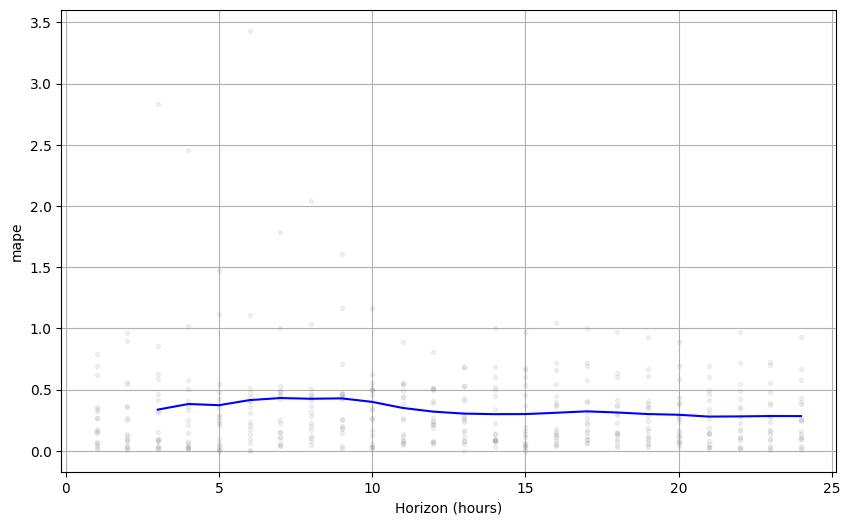

In [ ]:
# Plotting the metrics over time
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(train_cv, metric='mape')



/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


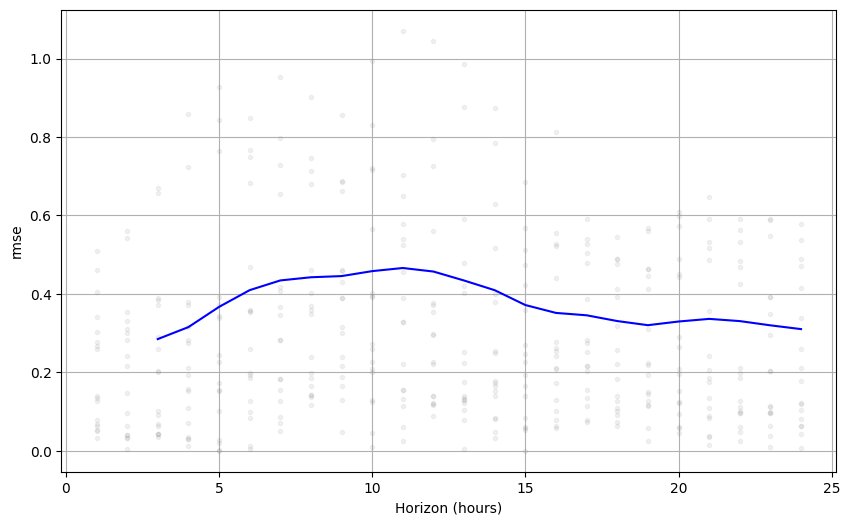

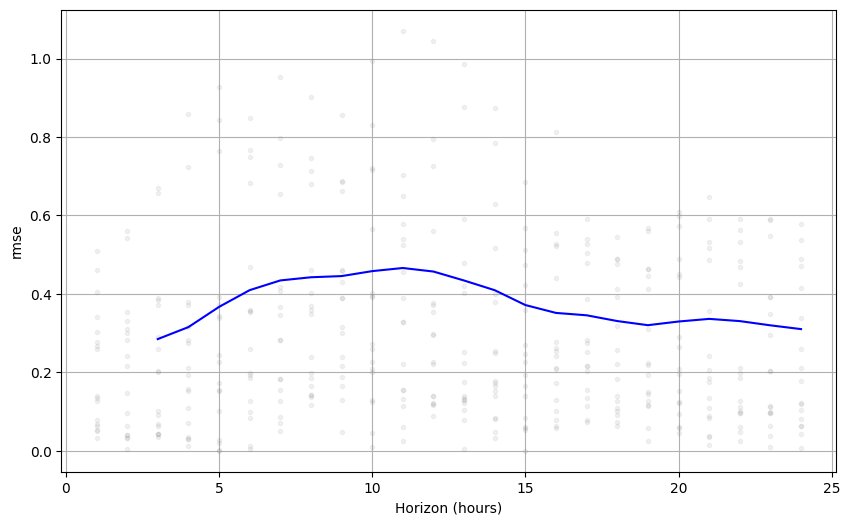

In [ ]:
plot_cross_validation_metric(train_cv, metric='rmse')

# Parameter Tuning

In [ ]:
# Define the parameter grid to search
param_gird = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'seasonality_prior_scale': [5, 10, 20, 30],
    'changepoint_prior_scale': [0.01, 0.05, 0.5, 1]
}



In [ ]:
# Generate all combinations of parameters
all_params = list(ParameterGrid(param_gird))
# Print the parameter grid
all_params

[{'changepoint_prior_scale': 0.01,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 5},
 {'changepoint_prior_scale': 0.01,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.01,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.01,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 30},
 {'changepoint_prior_scale': 0.01,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 5},
 {'changepoint_prior_scale': 0.01,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.01,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.01,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 30},
 {'changepoint_prior_scale': 0.05,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 5},
 {'changepoint_prior_scale': 0.05,
  'seasonality_mo

In [ ]:
# Placeholder for results
tuning_results = []
# Build a pipeline for the parameter tuning
for params in all_params:
    # Building the prophet model
    m = Prophet(
        yearly_seasonality=True,
        # monthly_seasonality=True,
        **params)


    # Add additional regressors (external factors) to the model
    m.add_regressor('temperature_2m (°C)')
    m.add_regressor('relative_humidity_2m (%)')
    m.add_regressor('wind_speed_10m (km/h)')
    m.add_regressor('relative_humidity_2m (%) Lag3')
    m.add_regressor('wind_speed_10m(km/h) Lag6')
    m.add_regressor('soil_moisture_0_to_7cm (m³/m³) Lag72')
    m.add_regressor('direct_radiation (W/m²) Lag72')


    # fit the model to the train data
    m.fit(train)

    # Cross-validation
    train_cv = cross_validation(model=m, period='720 hours', horizon='24 hours', initial='8760 hours', parallel='processes')

    # Calculate RMSE and MAPE
    rmse = performance_metrics(train_cv)['rmse'].mean()
    mape = performance_metrics(train_cv)['mape'].mean()

    # Store the results
    tuning_results.append({
        'params': params,
        'rmse': rmse,
        'mape': mape
    })

流式输出内容被截断，只能显示最后 5000 行内容。
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7878', 'data', 'file=/tmp/tmpqfritso_/ff06zc72.json', 'init=/tmp/tmpqfritso_/1puw0mr_.json', 'output', 'file=/tmp/tmpqfritso_/prophet_model4u3yn7_m/prophet_model-20250603001019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqfritso_/7mp2u7nb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqfritso_/4lx8cbtf.json
00:10:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqfritso_/agnij24m.json
00:10:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqfritso_/w4z_lzfa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads

In [ ]:
tuning_results
# Show the results in a DataFrame
tuning_results_df = pd.DataFrame(tuning_results)
tuning_results_df.sort_values(by='rmse', ascending=True, inplace=True)
tuning_results_df
tuning_results = tuning_results_df['rmse']

In [ ]:

# Parameter Tuning Outcome
outcome = pd.DataFrame(all_params)
outcome['tuning_results'] = tuning_results
outcome

,changepoint_prior_scale,seasonality_mode,seasonality_prior_scale,tuning_results
0,0.01,additive,5,0.758149
1,0.01,additive,10,0.752806
2,0.01,additive,20,0.758801
3,0.01,additive,30,0.744494
4,0.01,multiplicative,5,0.664483
5,0.01,multiplicative,10,0.666373
6,0.01,multiplicative,20,0.665719
7,0.01,multiplicative,30,0.662890
8,0.05,additive,5,0.376502
9,0.05,additive,10,0.375793


In [ ]:


# Fetch the best parameters
best_params = all_params[tuning_results.idxmin()]

best_params



{'changepoint_prior_scale': 1,
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 20}

# Predict the future

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20943 entries, 0 to 20942
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   ds                                    20943 non-null  datetime64[ns]
 1   y                                     20943 non-null  float64       
 2   temperature_2m (°C)                   20943 non-null  float64       
 3   relative_humidity_2m (%)              20943 non-null  int64         
 4   wind_speed_10m (km/h)                 20943 non-null  float64       
 5   soil_moisture_0_to_7cm (m³/m³) Lag72  20943 non-null  float64       
 6   relative_humidity_2m (%) Lag3         20943 non-null  float64       
 7   wind_speed_10m(km/h) Lag6             20943 non-null  float64       
 8   direct_radiation (W/m²) Lag72         20943 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 1.4 MB


In [ ]:
# Building the prophet model with best_params
m = Prophet(
      yearly_seasonality=True,
      # monthly_seasonality=True,
      **best_params)

m.add_regressor('temperature_2m (°C)')
m.add_regressor('relative_humidity_2m (%)')
m.add_regressor('wind_speed_10m (km/h)')
m.add_regressor('relative_humidity_2m (%) Lag3')
m.add_regressor('wind_speed_10m(km/h) Lag6')
m.add_regressor('soil_moisture_0_to_7cm (m³/m³) Lag72')
m.add_regressor('direct_radiation (W/m²) Lag72')

m.fit(train)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqfritso_/_dzy9jdk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqfritso_/vlm2aa7b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12937', 'data', 'file=/tmp/tmpqfritso_/_dzy9jdk.json', 'init=/tmp/tmpqfritso_/vlm2aa7b.json', 'output', 'file=/tmp/tmpqfritso_/prophet_modelrm8iyx_n/prophet_model-20250603020507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:05:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:06:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
test.columns

Index(['ds', 'y', 'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'wind_speed_10m (km/h)', 'soil_moisture_0_to_7cm (m³/m³) Lag72',
       'relative_humidity_2m (%) Lag3', 'wind_speed_10m(km/h) Lag6',
       'direct_radiation (W/m²) Lag72'],
      dtype='object')

In [ ]:
# Remove any NAs
test = test.dropna()

In [ ]:
test = test.rename(columns={'Date': 'ds', 'Turbidity (NTU)': 'y'})



# Forecasting

In [ ]:
test

,ds,y,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_moisture_0_to_7cm (m³/m³) Lag72,relative_humidity_2m (%) Lag3,wind_speed_10m(km/h) Lag6,direct_radiation (W/m²) Lag72
20943,2023-05-26 06:00:00,0.422402,7.5,87,13.2,0.261,83.0,18.1,0.0
20944,2023-05-26 07:00:00,0.307034,8.1,86,14.1,0.261,83.0,16.6,0.0
20945,2023-05-26 08:00:00,0.288146,9.1,82,17.3,0.261,85.0,13.8,8.0
20946,2023-05-26 09:00:00,0.280129,10.5,76,18.1,0.261,87.0,13.2,9.0
20947,2023-05-26 10:00:00,0.274884,12.1,69,17.7,0.261,86.0,13.8,4.0
...,...,...,...,...,...,...,...,...,...
26174,2023-12-30 05:00:00,0.540938,7.1,88,21.8,0.395,88.0,24.8,0.0
26175,2023-12-30 06:00:00,0.536344,6.9,90,21.5,0.397,87.0,23.8,0.0
26176,2023-12-30 07:00:00,0.525177,6.9,90,21.4,0.404,88.0,21.1,0.0
26177,2023-12-30 08:00:00,0.522912,6.7,91,19.0,0.408,88.0,21.6,0.0


In [ ]:

# make predictions
future = m.make_future_dataframe(periods=len(test), freq='H')
future = future.merge(test, on='ds', how='left')
future = future[['ds', 'temperature_2m (°C)', 'relative_humidity_2m (%)', 'relative_humidity_2m (%) Lag3', 'wind_speed_10m (km/h)', 'wind_speed_10m(km/h) Lag6', 'soil_moisture_0_to_7cm (m³/m³) Lag72', 'direct_radiation (W/m²) Lag72']]
future = future.dropna()





/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


In [ ]:
future.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5236 entries, 20943 to 26178
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   ds                                    5236 non-null   datetime64[ns]
 1   temperature_2m (°C)                   5236 non-null   float64       
 2   relative_humidity_2m (%)              5236 non-null   float64       
 3   relative_humidity_2m (%) Lag3         5236 non-null   float64       
 4   wind_speed_10m (km/h)                 5236 non-null   float64       
 5   wind_speed_10m(km/h) Lag6             5236 non-null   float64       
 6   soil_moisture_0_to_7cm (m³/m³) Lag72  5236 non-null   float64       
 7   direct_radiation (W/m²) Lag72         5236 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 368.2 KB


In [ ]:
# Make the predictions
forecast = m.predict(future)

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,wind_speed_10m(km/h) Lag6,wind_speed_10m(km/h) Lag6_lower,wind_speed_10m(km/h) Lag6_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5231,2023-12-30 05:00:00,1.274926,-33.834167,37.001460,-32.794990,37.567084,-1.050463,-1.050463,-1.050463,-0.040554,...,-0.006209,-0.006209,-0.006209,-0.873366,-0.873366,-0.873366,0.0,0.0,0.0,0.224464
5232,2023-12-30 06:00:00,1.274903,-33.642965,36.598964,-32.801444,37.573456,-1.052367,-1.052367,-1.052367,-0.041547,...,-0.005648,-0.005648,-0.005648,-0.873632,-0.873632,-0.873632,0.0,0.0,0.0,0.222536
5233,2023-12-30 07:00:00,1.274880,-33.783696,36.372006,-32.807897,37.579829,-1.057867,-1.057867,-1.057867,-0.035424,...,-0.004135,-0.004135,-0.004135,-0.873900,-0.873900,-0.873900,0.0,0.0,0.0,0.217013
5234,2023-12-30 08:00:00,1.274857,-33.960408,36.882902,-32.814351,37.586201,-1.054588,-1.054588,-1.054588,-0.018363,...,-0.004415,-0.004415,-0.004415,-0.874169,-0.874169,-0.874169,0.0,0.0,0.0,0.220269
5235,2023-12-30 09:00:00,1.274834,-33.684108,36.635673,-32.820805,37.592573,-1.035798,-1.035798,-1.035798,0.007093,...,-0.005144,-0.005144,-0.005144,-0.874438,-0.874438,-0.874438,0.0,0.0,0.0,0.239036


In [ ]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5236 entries, 0 to 5235
Data columns (total 46 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   ds                                          5236 non-null   datetime64[ns]
 1   trend                                       5236 non-null   float64       
 2   yhat_lower                                  5236 non-null   float64       
 3   yhat_upper                                  5236 non-null   float64       
 4   trend_lower                                 5236 non-null   float64       
 5   trend_upper                                 5236 non-null   float64       
 6   additive_terms                              5236 non-null   float64       
 7   additive_terms_lower                        5236 non-null   float64       
 8   additive_terms_upper                        5236 non-null   float64       
 9   daily   

# Data Visualization

<Axes: >

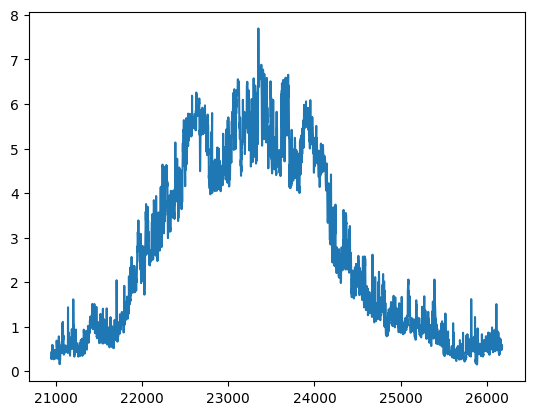

In [ ]:
test['y'].plot()

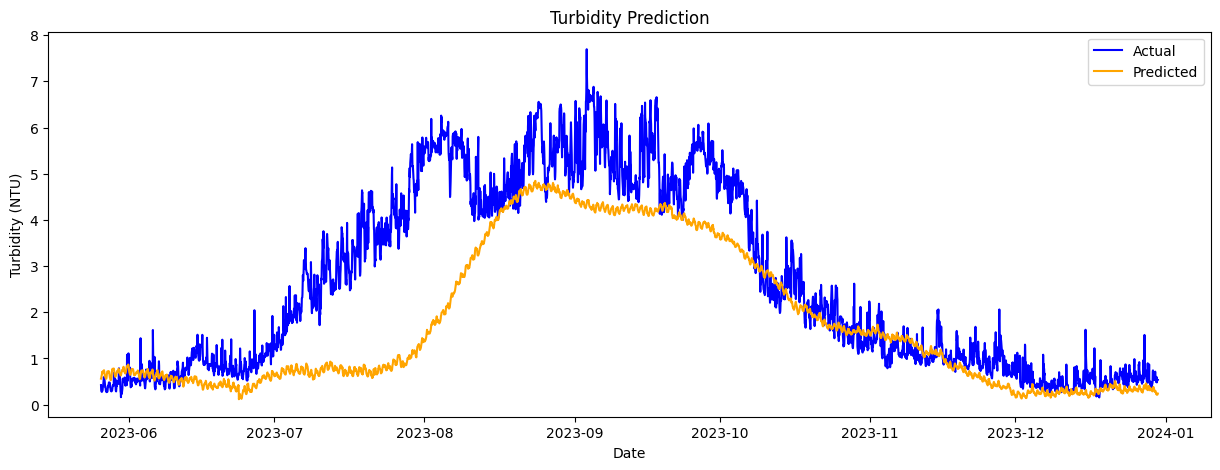

In [ ]:
# Visualize time series plot
plt.figure(figsize=(15, 5))
plt.plot(test['ds'], test['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='orange')
# plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty Interval')
plt.title('Turbidity Prediction')
plt.xlabel('Date')
plt.ylabel('Turbidity (NTU)')
plt.legend()
plt.show()


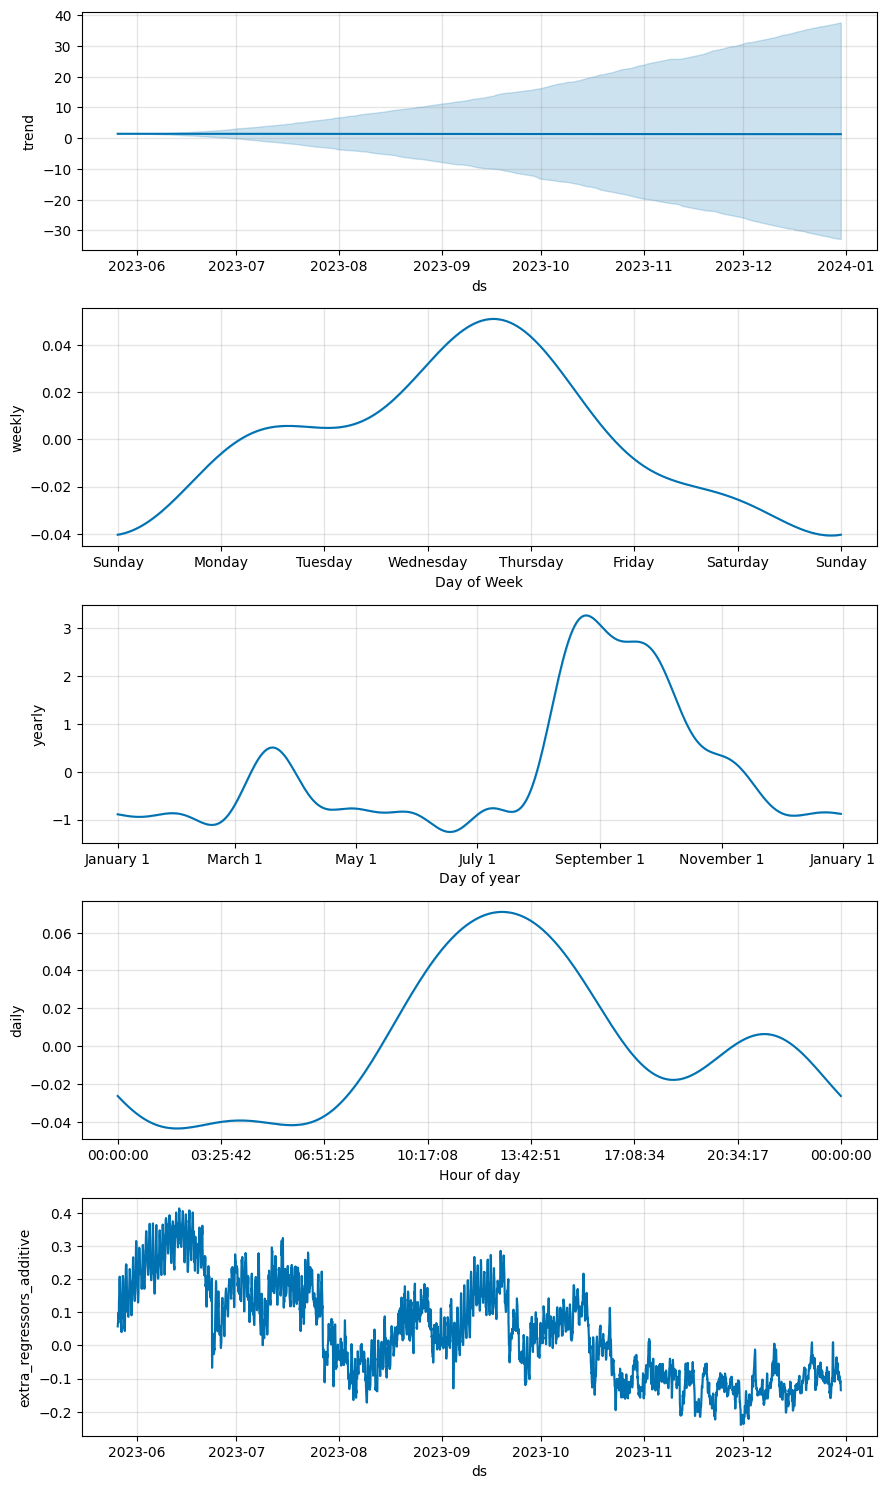

In [ ]:
# Visualize components plot
m.plot_components(forecast)
plt.show()

# Evaluation Metrics

In [ ]:
# calculate the metrcis on test data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error, mean_absolute_percentage_error
import numpy as np
mape = mean_absolute_percentage_error(test['y'], forecast['yhat'])

mse = mean_squared_error(test['y'], forecast['yhat'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['y'], forecast['yhat'])
r2 = r2_score(test['y'], forecast['yhat'])
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")
print(f"MAPE: {mape}")


MSE: 1.9396566436049092
RMSE: 1.3927155645015636
MAE: 0.9320092459878422
R2: 0.5182664559367314
MAPE: 0.36908995014885365


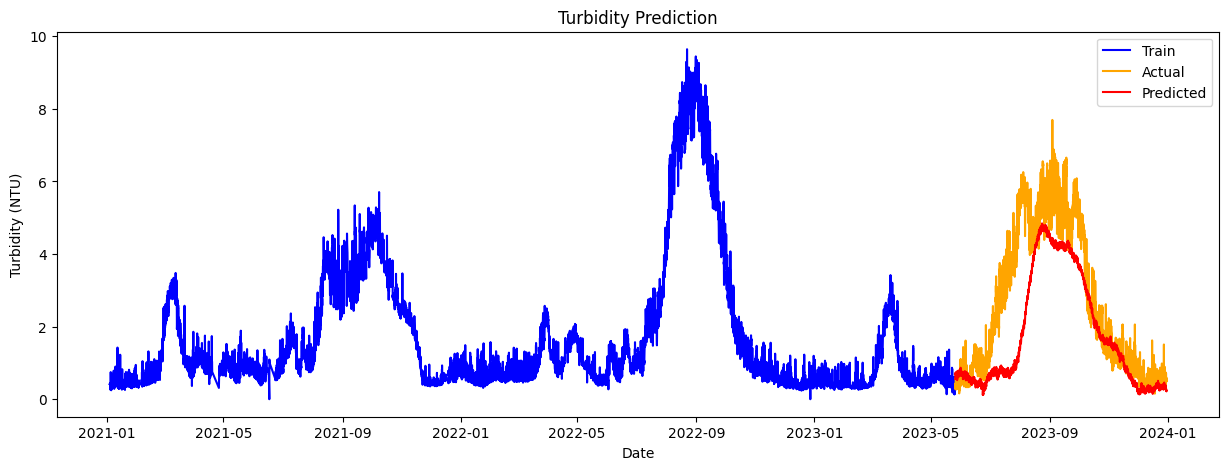

In [ ]:
# plot train and test data + predictions
plt.figure(figsize=(15, 5))
plt.plot(train['ds'], train['y'], label='Train', color='blue')
plt.plot(test['ds'], test['y'], label='Actual', color='orange')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='red')
plt.title('Turbidity Prediction')
plt.xlabel('Date')
plt.ylabel('Turbidity (NTU)')
plt.legend()
plt.show()


In [ ]:
# Create future dataframe for training period
train_future = m.make_future_dataframe(periods=0, freq='H')  # periods=0 means only historical dates

# Add regressor values for training period (they should already be in your train data)
train_future = train_future.merge(
    train[['ds', 'temperature_2m (°C)', 'relative_humidity_2m (%)', 'relative_humidity_2m (%) Lag3', 'wind_speed_10m (km/h)', 'wind_speed_10m(km/h) Lag6', 'soil_moisture_0_to_7cm (m³/m³) Lag72', 'direct_radiation (W/m²) Lag72']],
    on='ds', how='left'
)

# Make predictions on training data
train_forecast = m.predict(train_future)

# Extract predictions and actual values
train_predictions = train_forecast['yhat'].values
train_actual = train['y'].values

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


In [ ]:
# Create future dataframe that includes test period
test_future = m.make_future_dataframe(periods=len(test), freq='H')

# Combine train and test regressor data
all_regressors = pd.concat([
    train[['ds', 'temperature_2m (°C)', 'relative_humidity_2m (%)', 'relative_humidity_2m (%) Lag3', 'wind_speed_10m (km/h)', 'wind_speed_10m(km/h) Lag6', 'soil_moisture_0_to_7cm (m³/m³) Lag72', 'direct_radiation (W/m²) Lag72']],
    test[['ds', 'temperature_2m (°C)', 'relative_humidity_2m (%)', 'relative_humidity_2m (%) Lag3', 'wind_speed_10m (km/h)', 'wind_speed_10m(km/h) Lag6', 'soil_moisture_0_to_7cm (m³/m³) Lag72', 'direct_radiation (W/m²) Lag72']]
])

# Add regressor values to future dataframe
test_future = test_future.merge(all_regressors, on='ds', how='left')

# Make predictions (includes both train and test periods)
test_forecast = m.predict(test_future)

# Extract only test predictions (last n points where n = len(test))
test_predictions = test_forecast.tail(len(test))['yhat'].values
test_actual = test['y'].values

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


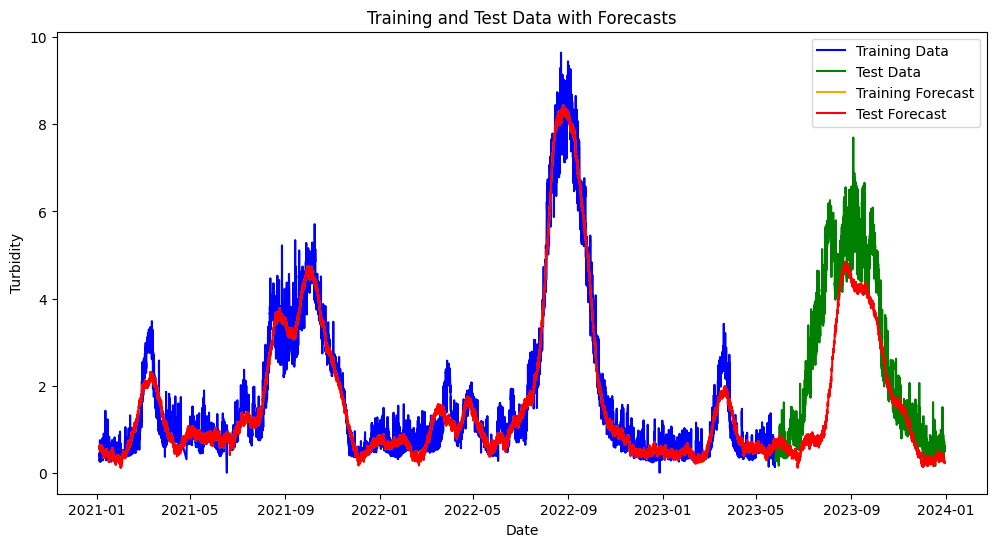

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train['ds'], train['y'], label='Training Data', color='blue')
plt.plot(test['ds'], test['y'], label='Test Data', color='green')
plt.plot(train_forecast['ds'], train_forecast['yhat'], label='Training Forecast', color='orange')
plt.plot(test_forecast['ds'], test_forecast['yhat'], label='Test Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Turbidity')
plt.title('Training and Test Data with Forecasts')
plt.legend()
plt.show()

In [ ]:
# calculate the metrcis on train data and test data
train_mse = mean_squared_error(train_actual, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(train_actual, train_predictions)
train_mae = mean_absolute_error(train_actual, train_predictions)
train_mape = np.mean(np.abs((train_actual - train_predictions) / train_actual)) * 100
test_mse = mean_squared_error(test_actual, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(test_actual, test_predictions)
test_mae = mean_absolute_error(test_actual, test_predictions)
test_mape = np.mean(np.abs((test_actual - test_predictions) / test_actual)) * 100
# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'R2', 'MAE', 'MAPE'],
    'Train': [train_mse, train_rmse, train_r2, train_mae, train_mape],
    'Test': [test_mse, test_rmse, test_r2, test_mae, test_mape]
})
metrics_df.set_index('Metric', inplace=True)
# Display the metrics DataFrame
metrics_df

<ipython-input-48-bdd8e52d8502>:6: RuntimeWarning: divide by zero encountered in divide
  train_mape = np.mean(np.abs((train_actual - train_predictions) / train_actual)) * 100


,Train,Test
Metric,,
MSE,0.132400,1.939657
RMSE,0.363868,1.392716
R2,0.958893,0.518266
MAE,0.265221,0.932009
MAPE,inf,36.908995
